# This notebook exemplifies the calculation of the reduction to Pole by using the *classical equivalent layer* approach.

In [20]:
# Import all python modules
import numpy
from matplotlib import pyplot

In [21]:
# Import some developed modules
from codes.prism import prism_tf
from codes.sphere import sphere_tfa
from codes.grids import regular_grid
from codes.equivalentlayer import layer, mat_mag, mat_grav

In [22]:
# Data shape
n = 50
shape = (n, n)

In [23]:
xo, yo, zo = regular_grid((-2000., 2000., -2000., 2000.), shape, -200.)

In [24]:
inc = 30.
dec = 50.
incs = 0.
decs = 0.

In [25]:
#tfa = sphere_tfa(xo, yo, zo, (0., 0., 200., 150., 1.), inc, dec, incs, decs)
tfp = prism_tf(xo, yo, zo, (-300., 150., -100., 280., 100., 750., 1.215), inc, dec, incs, decs)

In [26]:
# Statistical module
from codes.auxiliars import addnoise
from codes.statistical import analysis

In [27]:
print 'Analysing total field data:'
_ = analysis(tfp)

Analysing total field data:
Minimum:    -52.6585
Maximum:    31.9436
Mean value: -0.5712
Variation:  84.6021


In [28]:
#tfa = addnoise(tfa, 2., 0.025})
tf = addnoise(tfp, 2., 0.1)

#### Creating the layer

In [29]:
layer = layer((-2000., 2000., -2000., 2000.), shape, 700.)

In [30]:
mat = mat_mag(xo, yo, zo, layer, inc, dec, incs, decs)

In [31]:
T = numpy.abs(numpy.matrix.trace(mat))
print 'Trace of matrix:', T

Trace of matrix: 0.000190902057348


In [32]:
I = numpy.identity(n**2)

In [33]:
vec = numpy.linalg.solve(numpy.dot(mat.T, mat) + (0.)*I, numpy.dot(mat.T, tfp))

In [34]:
predicted = numpy.dot(mat, vec)

In [35]:
from codes.auxiliars import residual

In [36]:
res, mean, deviation = residual(tfp, predicted)

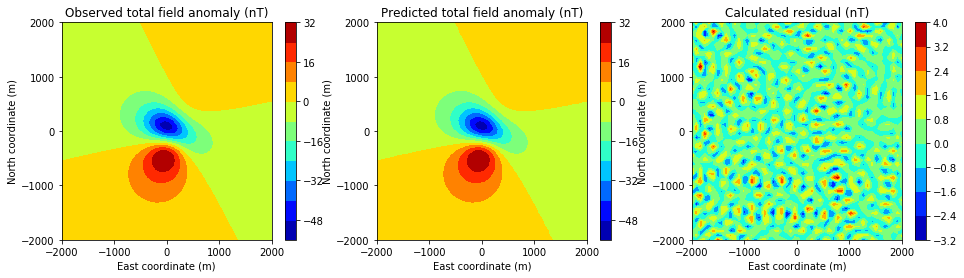

In [48]:
pyplot.figure(figsize=(16, 4))

pyplot.subplot(1, 3, 1)
pyplot.contourf(yo.reshape(n,n), xo.reshape(n,n), tfp.reshape(n,n), 10, cmap = pyplot.cm.jet)
pyplot.title('Observed total field anomaly (nT)')
pyplot.xlabel('East coordinate (m)')
pyplot.ylabel('North coordinate (m)')
pyplot.xticks(numpy.linspace(xo.min(), xo.max(), 5))
pyplot.yticks(numpy.linspace(yo.min(), yo.max(), 5))
pyplot.colorbar()

pyplot.subplot(1, 3, 2)
pyplot.contourf(yo.reshape(n,n), xo.reshape(n,n), predicted.reshape(n,n), 10, cmap = pyplot.cm.jet)
pyplot.title('Predicted total field anomaly (nT)')
pyplot.xlabel('East coordinate (m)')
pyplot.ylabel('North coordinate (m)')
pyplot.xticks(numpy.linspace(xo.min(), xo.max(), 5))
pyplot.yticks(numpy.linspace(yo.min(), yo.max(), 5))
pyplot.colorbar()

pyplot.subplot(1, 3, 3)
pyplot.contourf(yo.reshape(n,n), xo.reshape(n,n), res.reshape(n,n), 10, cmap = pyplot.cm.jet)
pyplot.title('Calculated residual (nT)')
pyplot.xlabel('East coordinate (m)')
pyplot.ylabel('North coordinate (m)')
pyplot.xticks(numpy.linspace(xo.min(), xo.max(), 5))
pyplot.yticks(numpy.linspace(yo.min(), yo.max(), 5))
pyplot.colorbar()

pyplot.show()

### Applying the reduction to Pole by using Equivalent Layer

In [38]:
inc_polo = 90.
dec_polo = 0.

In [39]:
# Calculo da RTP verdadeira
#true_rtp = sphere_tfa(xo, yo, zo, (0., 0., 200., 150., 1.), inc_polo, dec_polo)
true_rtp = prism_tf(xo, yo, zo, (-300., 150., -100., 280., 100., 750., 1.215), inc_polo, dec_polo)

In [40]:
# Calculo da RTP via Fourier
from codes.filtering import reduction

In [42]:
rtp = reduction(xo.reshape(n,n), yo.reshape(n,n), tfp.reshape(n,n), inc, dec, incs, decs)

codes/auxiliars.py:207: RuntimeWarning: invalid value encountered in divide
  theta = z + ((x*u + y*v)/k)*1j


In [43]:
# Calculo da RTP via camada equivalente
layer_rtp = mat_mag(xo, yo, zo, layer, inc_polo, dec_polo, inc_polo, dec_polo)

In [44]:
tf_rtp = numpy.dot(layer_rtp, vec)

/home/nielsendelimar/anaconda2/lib/python2.7/site-packages/matplotlib/contour.py:1480: UserWarning: Warning: converting a masked element to nan.
  self.zmax = float(z.max())
/home/nielsendelimar/anaconda2/lib/python2.7/site-packages/matplotlib/contour.py:1481: UserWarning: Warning: converting a masked element to nan.
  self.zmin = float(z.min())


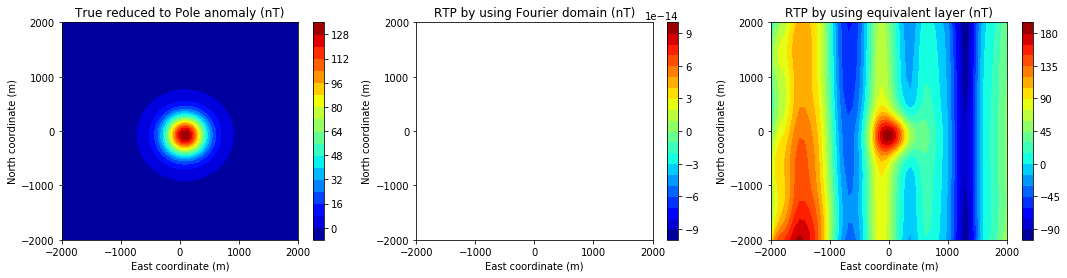

In [45]:
pyplot.figure(figsize=(18, 4))

pyplot.subplot(1, 3, 1)
pyplot.contourf(yo.reshape(n,n), xo.reshape(n,n), true_rtp.reshape(n,n), 20, cmap = pyplot.cm.jet)
pyplot.title('True reduced to Pole anomaly (nT)')
pyplot.xlabel('East coordinate (m)')
pyplot.ylabel('North coordinate (m)')
pyplot.xticks(numpy.linspace(xo.min(), xo.max(), 5))
pyplot.yticks(numpy.linspace(yo.min(), yo.max(), 5))
pyplot.colorbar()

pyplot.subplot(1, 3, 2)
pyplot.contourf(yo.reshape(n,n), xo.reshape(n,n), rtp.reshape(n,n), 20, cmap = pyplot.cm.jet)
pyplot.title('RTP by using Fourier domain (nT)')
pyplot.xlabel('East coordinate (m)')
pyplot.ylabel('North coordinate (m)')
pyplot.xticks(numpy.linspace(xo.min(), xo.max(), 5))
pyplot.yticks(numpy.linspace(yo.min(), yo.max(), 5))
pyplot.colorbar()

pyplot.subplot(1, 3, 3)
pyplot.contourf(yo.reshape(n,n), xo.reshape(n,n), tf_rtp.reshape(n,n), 20, cmap = pyplot.cm.jet)
pyplot.title('RTP by using equivalent layer (nT)')
pyplot.xlabel('East coordinate (m)')
pyplot.ylabel('North coordinate (m)')
pyplot.xticks(numpy.linspace(xo.min(), xo.max(), 5))
pyplot.yticks(numpy.linspace(yo.min(), yo.max(), 5))
pyplot.colorbar()

pyplot.show()